In [26]:
#Data & Frame
import pandas as pd
import numpy as np
import yfinance as yf

#Visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

import warnings


In [2]:
# Suppress all warnings
warnings.filterwarnings("ignore")

# Display all columns in a dataset
pd.set_option('display.max_columns',None)

In [5]:
sector_data = pd.read_csv('/Users/xonkar/Desktop/Data_Projects/Options/Technology/Structured_Data.csv')
sector_data

,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance,1PN,3PN,5PN,WeekDay
0,2023-01-09,3:59:57 PM,MSFT,SWEEP,200,6.75,A,OTM,CALL,235.0,227.14,135000,2023-02-17,WHITE,0.33,39,F,STOCK,Information Technology,F,F,1676733000000,16193,2023-01-10,2023-01-12,2023-01-16,228.85,238.51,240.35,0.75,5.01,5.82,3.46,positive,positive,positive,Monday
1,2023-01-09,3:59:44 PM,BABA,BLOCK,304,3.90,B,OTM,CALL,121.0,110.84,118560,2023-02-10,YELLOW,0.58,32,F,STOCK,Information Technology,F,F,291151000000,23,2023-01-10,2023-01-12,2023-01-16,114.88,113.15,115.19,3.65,2.09,3.93,9.17,positive,positive,positive,Monday
2,2023-01-09,3:58:22 PM,NVDA,BLOCK,250,8.46,B,ITM,CALL,150.0,156.19,211500,2023-01-13,MAGENTA,0.74,4,F,STOCK,Information Technology,F,T,365531000000,3918,2023-01-10,2023-01-12,2023-01-16,159.09,165.11,177.02,1.86,5.71,13.34,-3.96,positive,positive,positive,Monday
3,2023-01-09,3:58:16 PM,BABA,SWEEP,500,14.85,B,ITM,CALL,100.0,110.92,742522,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.88,113.15,115.19,3.57,2.01,3.85,-9.84,positive,positive,positive,Monday
4,2023-01-09,3:58:05 PM,BABA,SWEEP,250,14.88,B,ITM,CALL,100.0,110.92,371961,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.88,113.15,115.19,3.57,2.01,3.85,-9.84,positive,positive,positive,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2023-01-09,9:30:02 AM,CRM,BLOCK,1000,21.90,B,OTM,CALL,150.0,143.53,2190000,2024-01-19,YELLOW,0.39,375,F,STOCK,Information Technology,F,F,140510000000,755,2023-01-10,2023-01-12,2023-01-16,147.44,149.60,148.47,2.72,4.23,3.44,4.51,positive,positive,positive,Monday
1299,2023-01-09,9:30:00 AM,AAPL,ML/,999,6.15,B,OTM,CALL,145.0,130.70,614555,2023-06-16,WHITE,0.32,157,F,STOCK,Information Technology,F,F,2062010000000,13919,2023-01-10,2023-01-12,2023-01-16,130.73,133.41,135.94,0.02,2.07,4.01,10.94,positive,positive,positive,Monday
1300,2023-01-09,9:30:00 AM,AAPL,ML/,999,10.25,BB,ATM,PUT,130.0,130.70,1023805,2023-06-16,WHITE,0.33,157,F,STOCK,Information Technology,F,F,2062010000000,71667,2023-01-10,2023-01-12,2023-01-16,130.73,133.41,135.94,0.02,2.07,4.01,-0.54,positive,positive,positive,Monday
1301,2023-01-09,9:30:00 AM,AMD,ML/,998,4.78,A,ITM,PUT,70.0,66.00,477041,2023-01-20,WHITE,0.49,11,F,STOCK,Information Technology,F,F,103126000000,61125,2023-01-10,2023-01-12,2023-01-16,68.05,70.80,71.59,3.11,7.27,8.47,6.06,positive,positive,positive,Monday


## Check Stats and Corresponding Flow

In [11]:
sector_data.describe()

,Volume,Price,Strike,Spot,Premium,ImpliedVolatility,Dte,MktCap,OI,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance
count,1303.000000,1303.000000,1303.000000,1303.000000,1.303000e+03,1303.000000,1303.000000,1.303000e+03,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,831.721412,23.087475,146.280123,129.300384,1.354432e+06,0.591358,87.839601,6.000706e+11,7317.810437,129.743170,133.201443,135.978358,0.588127,2.928281,5.270967,18.490629
std,1516.502288,34.497039,101.125413,91.405175,2.848694e+06,0.495703,144.422600,7.873026e+11,12745.999311,90.893624,95.198603,96.410166,2.715707,3.990783,6.079894,49.565312
min,80.000000,0.200000,2.500000,5.060000,1.000000e+05,0.000000,4.000000,0.000000e+00,0.000000,5.750000,6.160000,6.180000,-5.000000,-15.170000,-19.790000,-90.770000
25%,206.000000,4.455000,95.000000,69.795000,1.727360e+05,0.350000,11.000000,4.648400e+10,614.500000,70.030000,71.800000,75.100000,-0.960000,0.940000,2.605000,-2.180000
50%,398.000000,9.750000,130.000000,122.400000,3.512340e+05,0.520000,39.000000,2.458990e+11,2657.000000,126.930000,131.630000,130.620000,0.010000,2.430000,4.110000,2.180000
75%,845.500000,28.240000,165.000000,150.860000,1.175628e+06,0.665000,101.000000,1.036536e+12,8919.500000,154.325000,156.750000,159.800000,1.700000,4.130000,7.120000,25.895000
max,22046.000000,303.400000,925.000000,917.800000,3.112090e+07,4.910000,892.000000,2.062010e+12,100711.000000,915.780000,1024.310000,1070.000000,23.300000,38.860000,65.330000,532.910000


In [10]:
# Find the maximum value in the 'Distance' column
max_distance = sector_data['Distance'].max()

# Filter the DataFrame to retrieve rows where the 'Distance' column equals the maximum value
largest_value = sector_data[sector_data['Distance'] == max_distance]

# Print or display the filtered DataFrame
largest_value

,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance,1PN,3PN,5PN,WeekDay
376,2023-01-09,2:33:10 PM,DOCU,ML/,290,302.3,B,ITM,PUT,360.0,56.88,8766700,2023-01-20,WHITE,0.0,11,F,STOCK,Information Technology,F,F,10966000000,400,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.2,4.99,532.91,positive,positive,positive,Monday


## Visualize Performance Relation To Two Other Variables 

In [13]:
import plotly.graph_objects as go

# Define hover text with only the Symbol column
hover_text = sector_data['Symbol']

# Define colors based on '5D Performance' values
colors = ['red' if p < 0 else 'green' for p in sector_data['5D Performance']]

# Create a trace for the scatter plot
trace = go.Scatter3d(
    x=sector_data['Distance'],
    y=sector_data['Dte'],
    z=sector_data['5D Performance'],
    mode='markers',
    marker=dict(
        size=5,
        color=colors,           # Set color based on '5D Performance' values
        opacity=0.6             # Marker opacity
    ),
    hovertext=hover_text       # Set hover text to show only Symbol
)

# Create layout for the plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Distance'),
        yaxis=dict(title='Dte'),
        zaxis=dict(title='Performance')
    ),
    title='3D Scatter Plot: Distance vs Dte vs Performance'
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the interactive plot
fig.show()


## Scan for Specific Stock Flow 

In [12]:
# Create a filter for the desired stocks
desired_stocks = ['DOCU']  # Replace with the stocks you want to filter
# Filter the DataFrame based on the 'Symbol' column
filtered_df = sector_data[sector_data['Symbol'].isin(desired_stocks)]
filtered_df = filtered_df.reset_index(drop=True)

# Display the filtered DataFrame
filtered_df


,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance,1PN,3PN,5PN,WeekDay
0,2023-01-09,2:46:41 PM,DOCU,ML/,150,20.70,A,ITM,PUT,77.5,56.90,310500,2023-01-20,WHITE,0.99,11,F,STOCK,Information Technology,F,F,10966000000,372,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.02,3.16,4.96,36.20,positive,positive,positive,Monday
1,2023-01-09,2:46:41 PM,DOCU,ML/,150,303.40,A,ITM,PUT,360.0,56.90,4551000,2023-01-20,MAGENTA,4.91,11,F,STOCK,Information Technology,F,F,10966000000,400,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.02,3.16,4.96,532.69,positive,positive,positive,Monday
2,2023-01-09,2:46:41 PM,DOCU,ML/,230,243.12,A,ITM,PUT,300.0,56.90,5591750,2023-01-20,YELLOW,4.08,11,F,STOCK,Information Technology,F,F,10966000000,206,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.02,3.16,4.96,427.24,positive,positive,positive,Monday
3,2023-01-09,2:46:41 PM,DOCU,ML/,230,23.25,A,ITM,PUT,80.0,56.90,534750,2023-01-20,WHITE,1.13,11,F,STOCK,Information Technology,F,F,10966000000,328,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.02,3.16,4.96,40.60,positive,positive,positive,Monday
4,2023-01-09,2:37:44 PM,DOCU,ML/,500,43.05,B,ITM,PUT,100.0,56.88,2152500,2023-01-20,YELLOW,1.21,11,F,STOCK,Information Technology,F,F,10966000000,438,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,75.81,positive,positive,positive,Monday
5,2023-01-09,2:37:44 PM,DOCU,ML/,1060,53.18,A,ITM,PUT,110.0,56.88,5637300,2023-01-20,WHITE,1.81,11,F,STOCK,Information Technology,F,F,10966000000,2131,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,93.39,positive,positive,positive,Monday
6,2023-01-09,2:37:44 PM,DOCU,ML/,560,133.30,A,ITM,PUT,190.0,56.88,7464800,2023-01-20,YELLOW,3.27,11,F,STOCK,Information Technology,F,F,10966000000,500,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,234.04,positive,positive,positive,Monday
7,2023-01-09,2:33:10 PM,DOCU,ML/,470,213.67,A,ITM,PUT,270.0,56.88,10042700,2024-01-19,YELLOW,1.30,375,F,STOCK,Information Technology,F,F,10966000000,425,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,374.68,positive,positive,positive,Monday
8,2023-01-09,2:33:10 PM,DOCU,ML/,760,53.15,A,ITM,PUT,110.0,56.88,4039400,2023-01-20,WHITE,1.75,11,F,STOCK,Information Technology,F,F,10966000000,2131,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,93.39,positive,positive,positive,Monday
9,2023-01-09,2:33:10 PM,DOCU,ML/,290,302.30,B,ITM,PUT,360.0,56.88,8766700,2023-01-20,WHITE,0.00,11,F,STOCK,Information Technology,F,F,10966000000,400,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,532.91,positive,positive,positive,Monday


## Pre-proccesing Data for Modeling

In [9]:
sector_data.columns

Index(['CreatedDate', 'CreatedTime', 'Symbol', 'Type', 'Volume', 'Price',
       'Side', 'Money', 'CallPut', 'Strike', 'Spot', 'Premium',
       'ExpirationDate', 'Color', 'ImpliedVolatility', 'Dte', 'ER', 'StockEtf',
       'Sector', 'Uoa', 'Weekly', 'MktCap', 'OI', '1D After', '3D After',
       '5D After', '1D Price', '3D Price', '5D Price', '1D Performance',
       '3D Performance', '5D Performance', 'Distance', '1PN', '3PN', '5PN',
       'WeekDay'],
      dtype='object')

In [20]:
# Specify the list of column names you want to extract
columns_to_keep = ['Symbol','Type', 'Volume', 'Price',
       'Side', 'Money', 'CallPut', 'Strike', 'Spot', 'Premium',
       'Color','ImpliedVolatility', 'Dte', 'ER',
       'Uoa', 'Weekly', 'MktCap', 'OI',
       'Distance','1PN','1D Performance']

# Extract the specified columns from the original dataset
necessary_data = sector_data[columns_to_keep]
necessary_data

# Or perform any other analysis on the extracted columns


,Symbol,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,Color,ImpliedVolatility,Dte,ER,Uoa,Weekly,MktCap,OI,Distance,1PN,1D Performance
0,MSFT,SWEEP,200,6.75,A,OTM,CALL,235.0,227.14,135000,WHITE,0.33,39,F,F,F,1676733000000,16193,3.46,positive,0.75
1,BABA,BLOCK,304,3.90,B,OTM,CALL,121.0,110.84,118560,YELLOW,0.58,32,F,F,F,291151000000,23,9.17,positive,3.65
2,NVDA,BLOCK,250,8.46,B,ITM,CALL,150.0,156.19,211500,MAGENTA,0.74,4,F,F,T,365531000000,3918,-3.96,positive,1.86
3,BABA,SWEEP,500,14.85,B,ITM,CALL,100.0,110.92,742522,WHITE,0.59,39,F,F,F,291151000000,9468,-9.84,positive,3.57
4,BABA,SWEEP,250,14.88,B,ITM,CALL,100.0,110.92,371961,WHITE,0.59,39,F,F,F,291151000000,9468,-9.84,positive,3.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,CRM,BLOCK,1000,21.90,B,OTM,CALL,150.0,143.53,2190000,YELLOW,0.39,375,F,F,F,140510000000,755,4.51,positive,2.72
1299,AAPL,ML/,999,6.15,B,OTM,CALL,145.0,130.70,614555,WHITE,0.32,157,F,F,F,2062010000000,13919,10.94,positive,0.02
1300,AAPL,ML/,999,10.25,BB,ATM,PUT,130.0,130.70,1023805,WHITE,0.33,157,F,F,F,2062010000000,71667,-0.54,positive,0.02
1301,AMD,ML/,998,4.78,A,ITM,PUT,70.0,66.00,477041,WHITE,0.49,11,F,F,F,103126000000,61125,6.06,positive,3.11


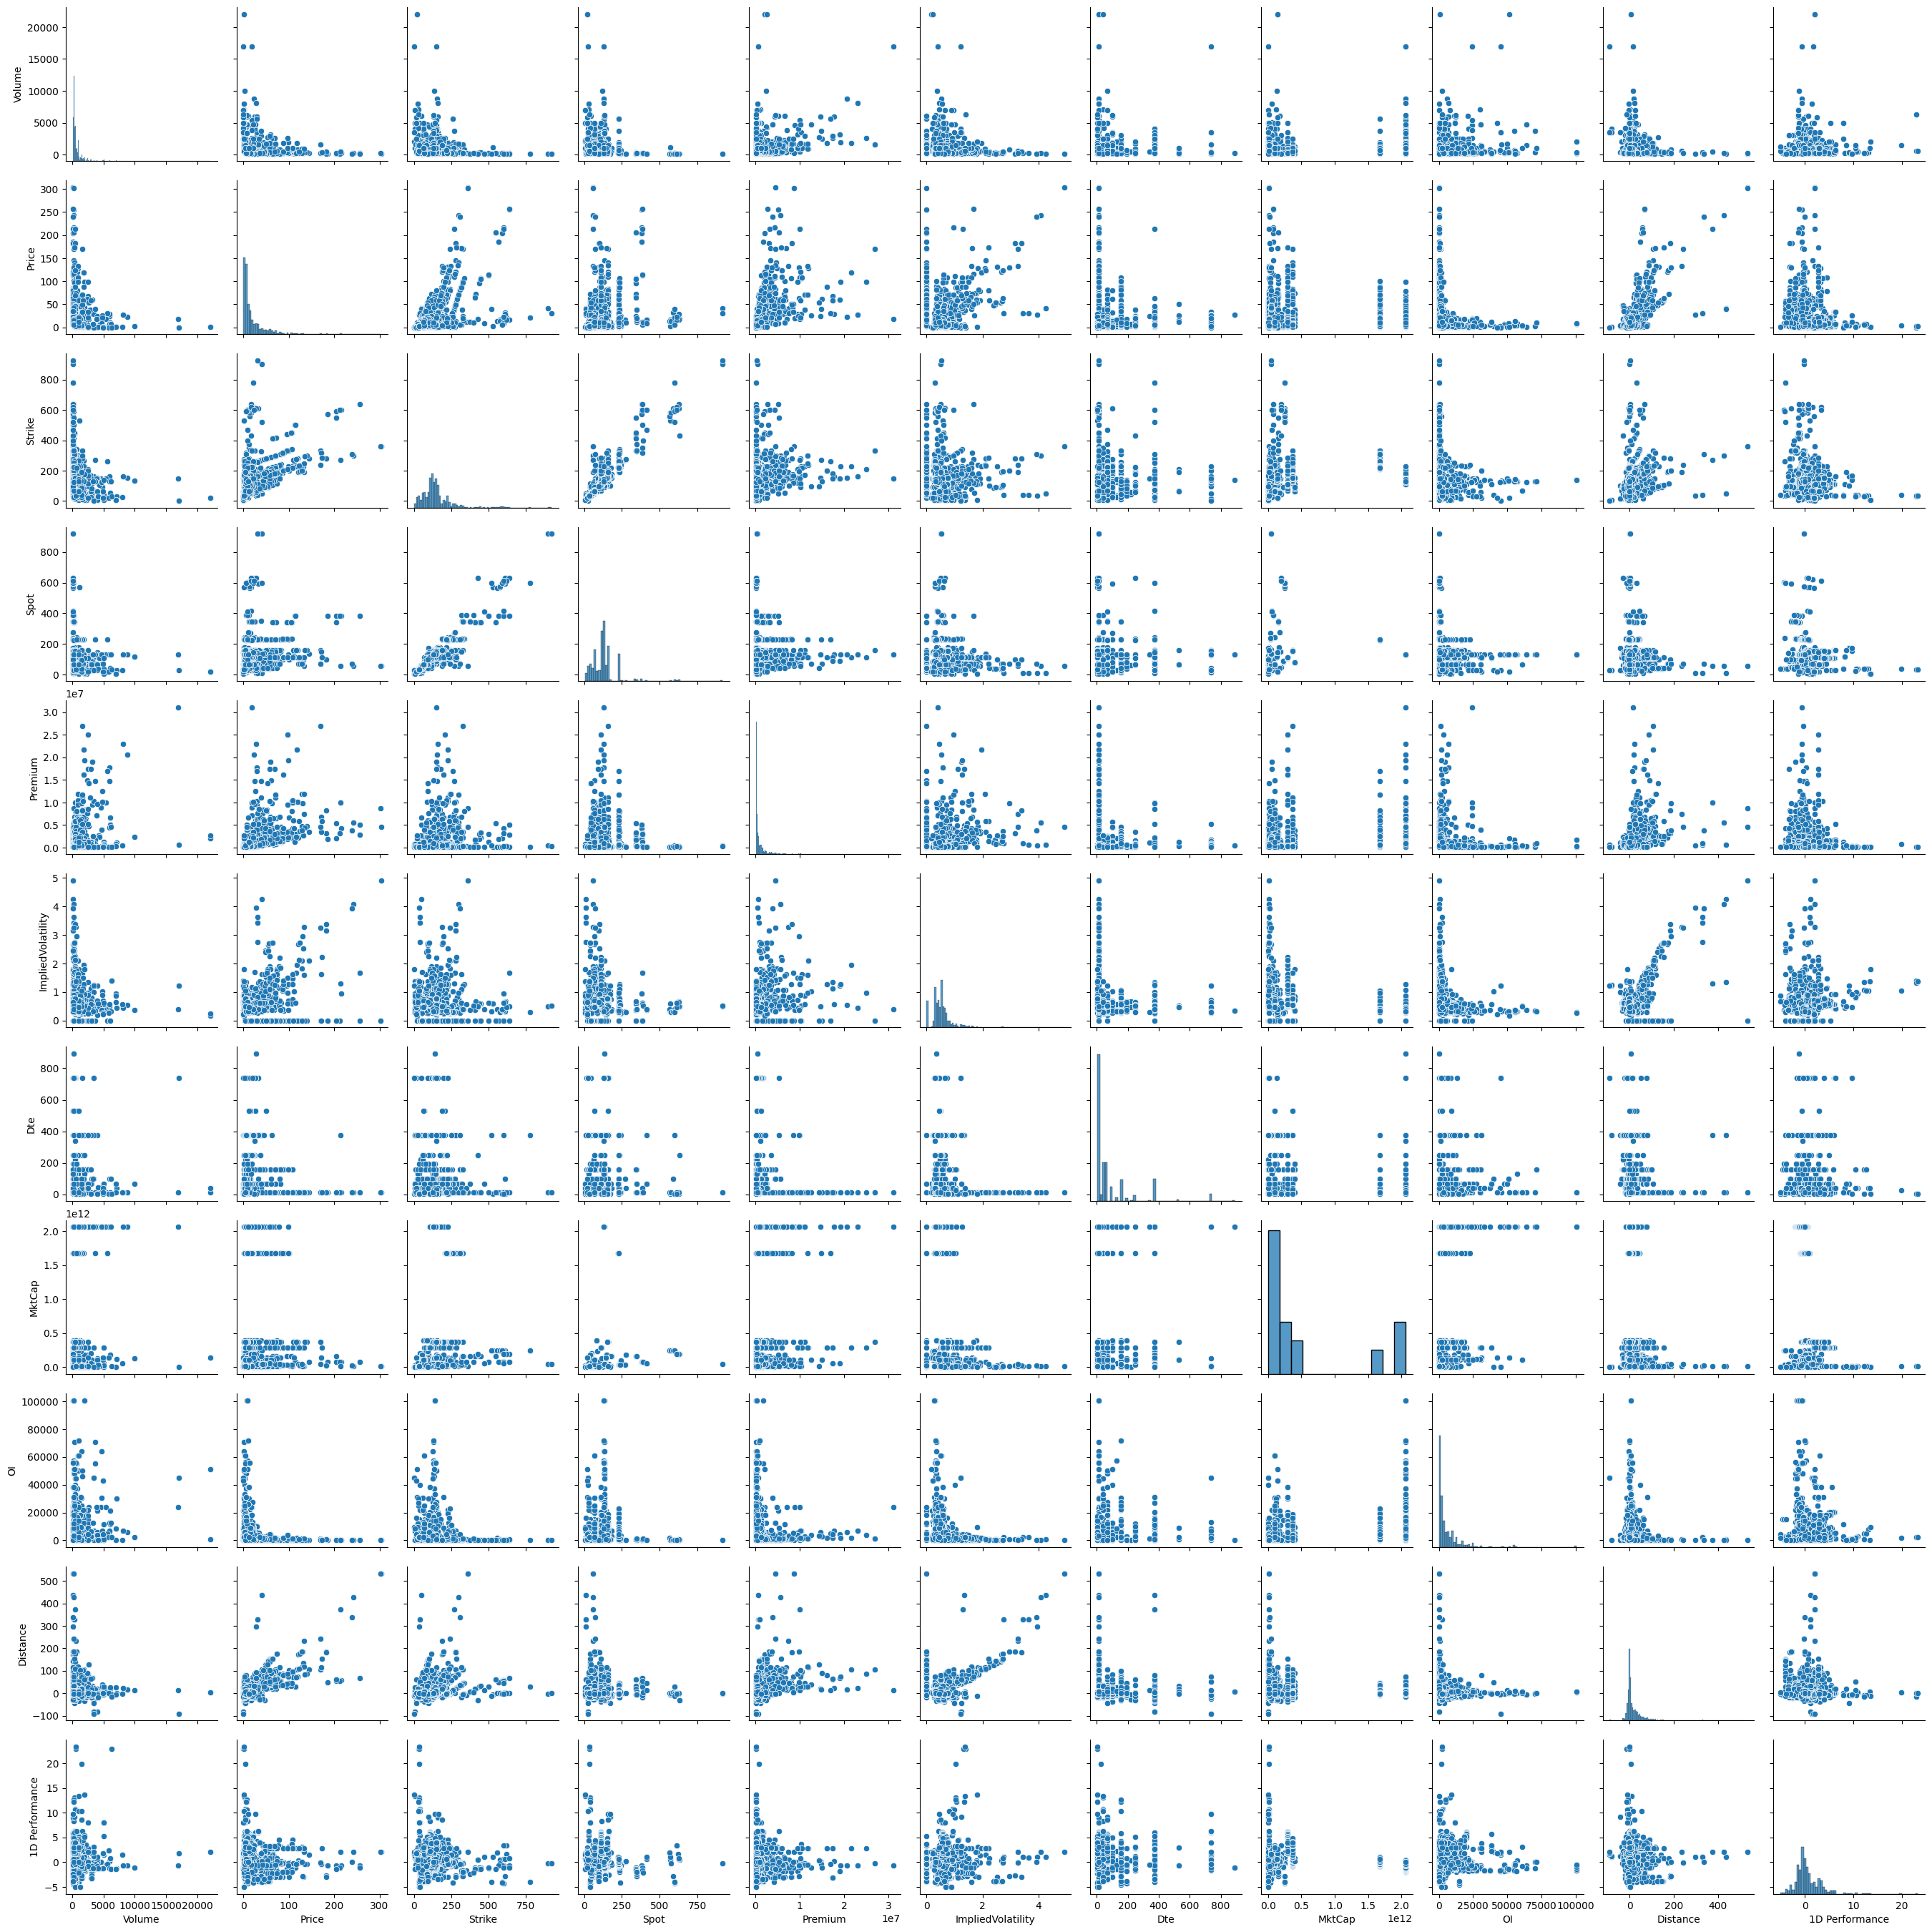

In [18]:
# Plot the Pairplot between stocks daily returns
sns.pairplot(necessary_data)


## Label Encoding

In [21]:
# Copy the dataframe
df_enc = necessary_data.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['1PN'] = (
    df_enc['1PN'].astype('category')
    .cat.set_categories(['negative', 'positive'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,Volume,Price,Strike,Spot,Premium,ImpliedVolatility,Dte,MktCap,OI,Distance,1PN,1D Performance,Symbol_AAPL,Symbol_ABNB,Symbol_ACN,Symbol_ADBE,Symbol_ADP,Symbol_AEHR,Symbol_AMAT,Symbol_AMBA,Symbol_AMD,Symbol_AMKR,Symbol_APPS,Symbol_ASML,Symbol_AVGO,Symbol_BABA,Symbol_BIDU,Symbol_BILI,Symbol_BILL,Symbol_CARS,Symbol_CLFD,Symbol_COIN,Symbol_CRM,Symbol_CRWD,Symbol_CSCO,Symbol_CSIQ,Symbol_DASH,Symbol_DDOG,Symbol_DOCU,Symbol_EA,Symbol_ENPH,Symbol_ENV,Symbol_ETSY,Symbol_FSLR,Symbol_FTDR,Symbol_FTNT,Symbol_HOOD,Symbol_IBM,Symbol_INTC,Symbol_IRM,Symbol_KLAC,Symbol_MARA,Symbol_MBLY,Symbol_MDB,Symbol_MELI,Symbol_MRVL,Symbol_MSFT,Symbol_MSTR,Symbol_MU,Symbol_NET,Symbol_NOW,Symbol_NVDA,Symbol_OKTA,Symbol_OLED,Symbol_ORCL,Symbol_PANW,Symbol_PI,Symbol_QCOM,Symbol_RAMP,Symbol_ROK,Symbol_SHOP,Symbol_SNAP,Symbol_SNOW,Symbol_SPLK,Symbol_SQ,Symbol_STX,Symbol_SWKS,Symbol_T,Symbol_TEAM,Symbol_TMUS,Symbol_TSM,Symbol_TTD,Symbol_TTWO,Symbol_TWLO,Symbol_TXN,Symbol_U,Symbol_UBER,Symbol_UMC,Symbol_VNET,Symbol_VZ,Symbol_WB,Symbol_WDAY,Symbol_WK,Symbol_WOLF,Symbol_ZM,Symbol_ZS,Type_BLOCK,Type_ML/,Type_SWEEP,Side_A,Side_AA,Side_B,Side_BB,Side_N,Money_ATM,Money_ITM,Money_OTM,CallPut_CALL,CallPut_PUT,Color_#FF0000,Color_MAGENTA,Color_WHITE,Color_YELLOW,ER_F,ER_T,Uoa_F,Uoa_T,Weekly_F,Weekly_T
0,200,6.75,235.0,227.14,135000,0.33,39,1676733000000,16193,3.46,1,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0
1,304,3.90,121.0,110.84,118560,0.58,32,291151000000,23,9.17,1,3.65,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0
2,250,8.46,150.0,156.19,211500,0.74,4,365531000000,3918,-3.96,1,1.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,500,14.85,100.0,110.92,742522,0.59,39,291151000000,9468,-9.84,1,3.57,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0
4,250,14.88,100.0,110.92,371961,0.59,39,291151000000,9468,-9.84,1,3.57,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0


In [23]:
# Isolate the outcome variable
y = df_enc['1PN']
# Display first few rows of the outcome variable
y.head() 

0    1
1    1
2    1
3    1
4    1
Name: 1PN, dtype: int8

In [24]:
# Select the features you want to use in your model
X = df_enc.drop('1PN', axis=1)
# Display the first few rows of the selected features 
X.head()

,Volume,Price,Strike,Spot,Premium,ImpliedVolatility,Dte,MktCap,OI,Distance,1D Performance,Symbol_AAPL,Symbol_ABNB,Symbol_ACN,Symbol_ADBE,Symbol_ADP,Symbol_AEHR,Symbol_AMAT,Symbol_AMBA,Symbol_AMD,Symbol_AMKR,Symbol_APPS,Symbol_ASML,Symbol_AVGO,Symbol_BABA,Symbol_BIDU,Symbol_BILI,Symbol_BILL,Symbol_CARS,Symbol_CLFD,Symbol_COIN,Symbol_CRM,Symbol_CRWD,Symbol_CSCO,Symbol_CSIQ,Symbol_DASH,Symbol_DDOG,Symbol_DOCU,Symbol_EA,Symbol_ENPH,Symbol_ENV,Symbol_ETSY,Symbol_FSLR,Symbol_FTDR,Symbol_FTNT,Symbol_HOOD,Symbol_IBM,Symbol_INTC,Symbol_IRM,Symbol_KLAC,Symbol_MARA,Symbol_MBLY,Symbol_MDB,Symbol_MELI,Symbol_MRVL,Symbol_MSFT,Symbol_MSTR,Symbol_MU,Symbol_NET,Symbol_NOW,Symbol_NVDA,Symbol_OKTA,Symbol_OLED,Symbol_ORCL,Symbol_PANW,Symbol_PI,Symbol_QCOM,Symbol_RAMP,Symbol_ROK,Symbol_SHOP,Symbol_SNAP,Symbol_SNOW,Symbol_SPLK,Symbol_SQ,Symbol_STX,Symbol_SWKS,Symbol_T,Symbol_TEAM,Symbol_TMUS,Symbol_TSM,Symbol_TTD,Symbol_TTWO,Symbol_TWLO,Symbol_TXN,Symbol_U,Symbol_UBER,Symbol_UMC,Symbol_VNET,Symbol_VZ,Symbol_WB,Symbol_WDAY,Symbol_WK,Symbol_WOLF,Symbol_ZM,Symbol_ZS,Type_BLOCK,Type_ML/,Type_SWEEP,Side_A,Side_AA,Side_B,Side_BB,Side_N,Money_ATM,Money_ITM,Money_OTM,CallPut_CALL,CallPut_PUT,Color_#FF0000,Color_MAGENTA,Color_WHITE,Color_YELLOW,ER_F,ER_T,Uoa_F,Uoa_T,Weekly_F,Weekly_T
0,200,6.75,235.0,227.14,135000,0.33,39,1676733000000,16193,3.46,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0
1,304,3.90,121.0,110.84,118560,0.58,32,291151000000,23,9.17,3.65,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0
2,250,8.46,150.0,156.19,211500,0.74,4,365531000000,3918,-3.96,1.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,500,14.85,100.0,110.92,742522,0.59,39,291151000000,9468,-9.84,3.57,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0
4,250,14.88,100.0,110.92,371961,0.59,39,291151000000,9468,-9.84,3.57,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0


In [27]:
# Split the data into training set and testing set without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [28]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [29]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

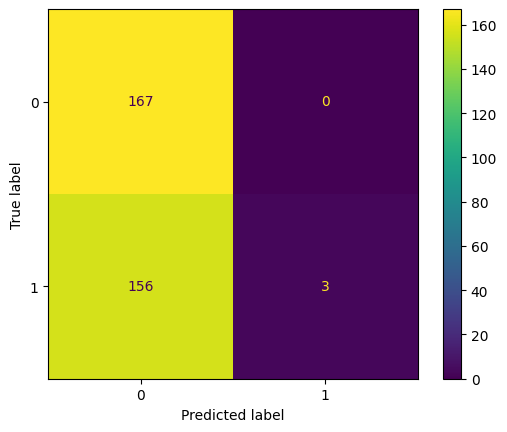

In [30]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

* The upper-left quadrant displays the number of true negatives.
* The upper-right quadrant displays the number of false positives.
* The bottom-left quadrant displays the number of false negatives.
* The bottom-right quadrant displays the number of true positives.

True negatives: The number of flows that performed negative the model accurately predicted performed negative.

False positives: The number of flows that performed negative the model inaccurately predicted as postive.

False negatives: The number of flows that performed positive the model inaccurately predicted negative.

True positives: The number of flows that performed positive the model accurately predicted as positive.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.


0 = negative 1 = positive 

In [31]:
necessary_data['1PN'].value_counts(normalize=True)

positive    0.500384
negative    0.499616
Name: 1PN, dtype: float64

In [32]:
# Create classification report for logistic regression model
target_names = ['Flow perform positive', 'Flow perform negative']
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

Flow perform positive       0.52      1.00      0.68       167
Flow perform negative       1.00      0.02      0.04       159

             accuracy                           0.52       326
            macro avg       0.76      0.51      0.36       326
         weighted avg       0.75      0.52      0.37       326



In [33]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate ROC AUC score (for binary classification)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

Precision: 1.0
Recall: 0.018867924528301886
F1-score: 0.037037037037037035
Accuracy: 0.5214723926380368
ROC AUC Score: 0.5094339622641509


Here's how to interpret the metrics:

Precision:
For the class 'Flow perform positive', precision is 0.52, which means that among all instances predicted as 'Flow perform positive', 52% were actually 'Flow perform positive'.
For the class 'Flow perform negative', precision is 1.00, indicating that all instances predicted as 'Flow perform negative' were actually 'Flow perform negative'.

Recall:
For the class 'Flow perform positive', recall is 1.00, meaning that among all actual instances of 'Flow perform positive', 100% were correctly classified as 'Flow perform positive'.
For the class 'Flow perform negative', recall is 0.02, indicating that only 2% of actual instances of 'Flow perform negative' were correctly classified as 'Flow perform negative'.

F1-score:
F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
For the class 'Flow perform positive', the F1-score is 0.68, which indicates a balance between precision and recall for this class.
For the class 'Flow perform negative', the F1-score is 0.04, suggesting a very low balance between precision and recall for this class.

Support:
Support refers to the number of actual occurrences of each class in the dataset.

Accuracy:
Accuracy is the overall correctness of the model, calculated as the ratio of correctly predicted instances to the total number of instances.

Macro avg:
Macro avg calculates the average of the metrics (precision, recall, F1-score) for each class, without considering class imbalance.

Weighted avg:
Weighted avg calculates the weighted average of the metrics, where each average is weighted by the number of samples in each class.

In summary, while the model performs well in predicting the 'Flow perform positive' class, it performs poorly in predicting the 'Flow perform negative' class, as indicated by the low recall and F1-score for that class.